> Reference: 
+ [machinelearningmastery: model comparison](http://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)

+ Compare linear algorithms to each other on a dataset
+ Compare nonlinear algorithms to each other on a dataset
+ Create plots of the results comparing algorithms
    - When you have a new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives.
    - The same idea applies to model selection. You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two to finalize.
    - A way to do this is to use different visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.696531 (0.057986)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


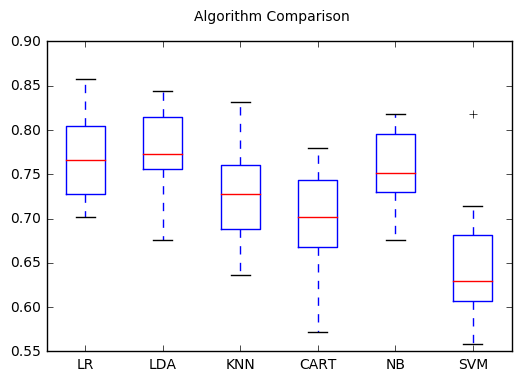

In [1]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, it would suggest that both logistic regression and linear discriminate analysis are perhaps worthy of further study on this problem.